In [ ]:
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Verificar los archivos subidos
print(uploaded)


Saving dairy.csv to dairy.csv
{'dairy.csv': b'FARM,YEAR,COWS,LAND,MILK,LABOR,FEED,YIT,X1,X2,X3,X4,X11,X22,X33,X44,X12,X13,X14,X23,X24,X34,YEAR93,YEAR94,YEAR95,YEAR96,YEAR97,YEAR98 \r\n1,93,15.3,8,73647,2,33435.738,11.2070387,-0.2508472,-0.3812693,0.2360746,-0.2680185,0.0314622,0.0726832,0.0278656,0.035917,0.0956403,-0.0592187,0.0672317,-0.090008,0.1021872,-0.0632724,1,0,0,0,0,0\r\n1,94,18.1,8,91260,2,36869.04,11.4214679,-0.0827881,-0.3812693,0.2360742,-0.1702716,0.0034269,0.0726832,0.0278655,0.0144962,0.0315645,-0.0195441,0.0140965,-0.0900079,0.0649193,-0.0401967,0,1,0,0,0,0\r\n1,97,17.1,7,110419,2,51013.578,11.6120375,-0.1396215,-0.5148007,0.2360754,0.154448,0.0097471,0.1325099,0.0278658,0.0119271,0.0718773,-0.0329612,-0.0215643,-0.1215318,-0.07951,0.0364614,0,0,0,0,1,0\r\n1,96,17.3,8,111454,2,50711.57,11.6213672,-0.1279935,-0.3812693,0.2360752,0.1485103,0.0081912,0.0726832,0.0278657,0.0110277,0.0488,-0.0302161,-0.0190084,-0.0900082,-0.0566224,0.0350596,0,0,0,1,0,0\r\n1,95,17.8,8,1184

Error Cuadrático Medio (MSE): 349563140.22904617
Raíz del Error Cuadrático Medio (RMSE): 18696.607719825704
Porcentaje de Error Promedio (MAPE): 11.12%
Coeficiente de Determinación (R²): 0.9520491058859036


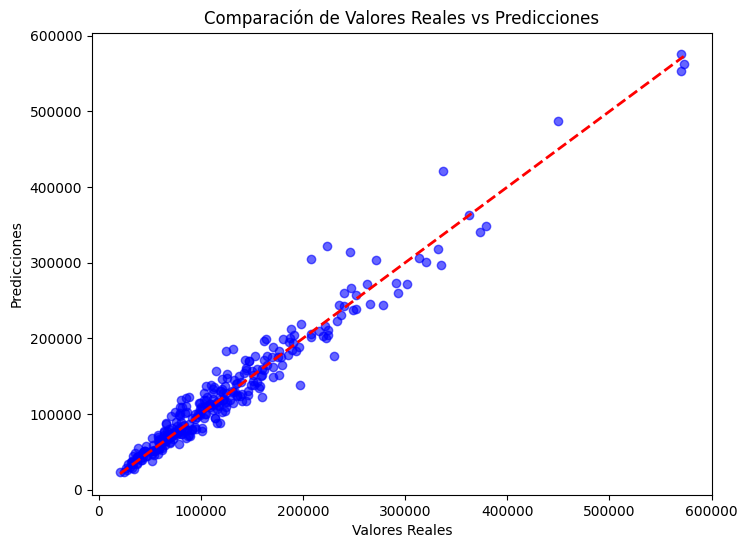

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('dairy.csv')

# Eliminar 'YIT' y las variables 'X' que son transformaciones o combinaciones de otras
# También eliminar variables relacionadas con años si no aportan información relevante
X = df.drop(columns=['MILK', 'YIT', 'X1', 'X2', 'X3', 'X4', 'X11', 'X12', 'X13', 'X14', 'X22', 'X33', 'X44', 'X23', 'X24', 'X34', 'YEAR93', 'YEAR94', 'YEAR95', 'YEAR96', 'YEAR97', 'YEAR98 '])  # Eliminar las variables no necesarias
y = df['MILK']  # 'MILK' como objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Porcentaje de Error Promedio (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinación (R²): {r2}")

# Visualizar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Reales vs Predicciones")
plt.show()



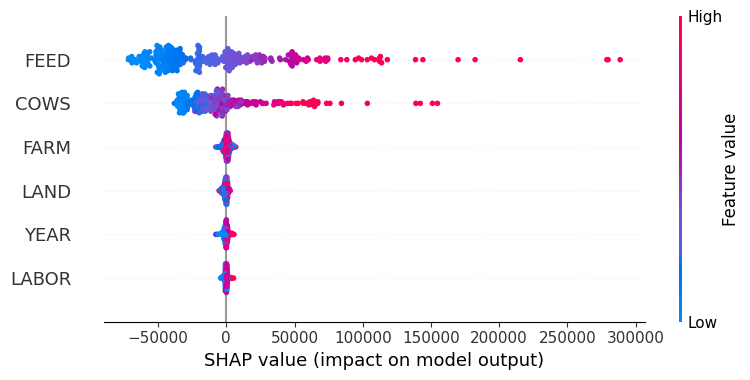

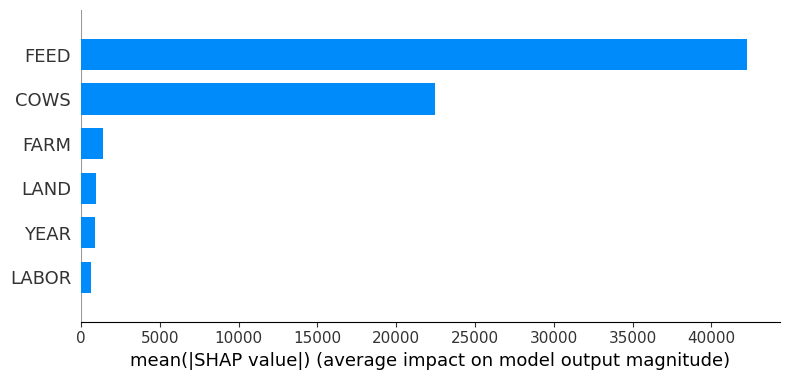

In [ ]:
# ---- Explicabilidad del Modelo con SHAP ----
import shap
# Crear un objeto explainer para el modelo Random Forest
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP para el conjunto de datos de prueba
shap_values = explainer.shap_values(X_test)

# Resumen de los valores SHAP
shap.summary_plot(shap_values, X_test)  # Gráfico de resumen

# Gráfico de barras con la importancia media de las características
shap.summary_plot(shap_values, X_test, plot_type="bar")